In [25]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline, make_union
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold  
from sklearn.feature_selection import SelectPercentile, f_regression
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train = pd.read_csv("../data/processed/train.csv")
train.pop("id")
target = train.pop("血糖")

In [27]:
train_x= train.as_matrix()
train_y = target.as_matrix()

In [28]:
clf = lgb.LGBMRegressor(objective='regression',
                    boosting_type ="GBDT",
                    num_leaves=31,
                    learning_rate=0.01,
                    feature_fraction=0.9,
                    bagging_fraction=0.8,
                    bagging_freq=5,
                    n_estimators=500)
clf.fit(train_x, train_y, feature_name=train.columns.tolist())

/home/altman/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))
/home/altman/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:648: LGBMDeprecationWarning: The `max_bin` parameter is deprecated and will be removed in 2.0.12 version. Please use `params` to pass this parameter.
  'Please use `params` to pass this parameter.', LGBMDeprecationWarning)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, boosting_type='GBDT',
       colsample_bytree=1.0, feature_fraction=0.9, learning_rate=0.01,
       max_bin=255, max_depth=-1, min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
       n_jobs=-1, num_leaves=31, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=1)

In [29]:
feature_importance = clf.feature_importances_

In [30]:
features = pd.DataFrame({"columns":train.columns.tolist(),"importance":feature_importance})

In [31]:
features = features.sort_values(by=['importance'],ascending=False)

In [32]:
features

,columns,importance
28,甘油三酯,778
32,尿素,749
40,红细胞平均体积,709
20,*天门冬氨酸氨基转换酶,669
22,*碱性磷酸酶,632
34,尿酸,621
36,白细胞计数,558
42,红细胞平均血红蛋白浓度,543
21,*丙氨酸氨基转换酶,501
23,*r-谷氨酰基转换酶,489


/home/altman/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


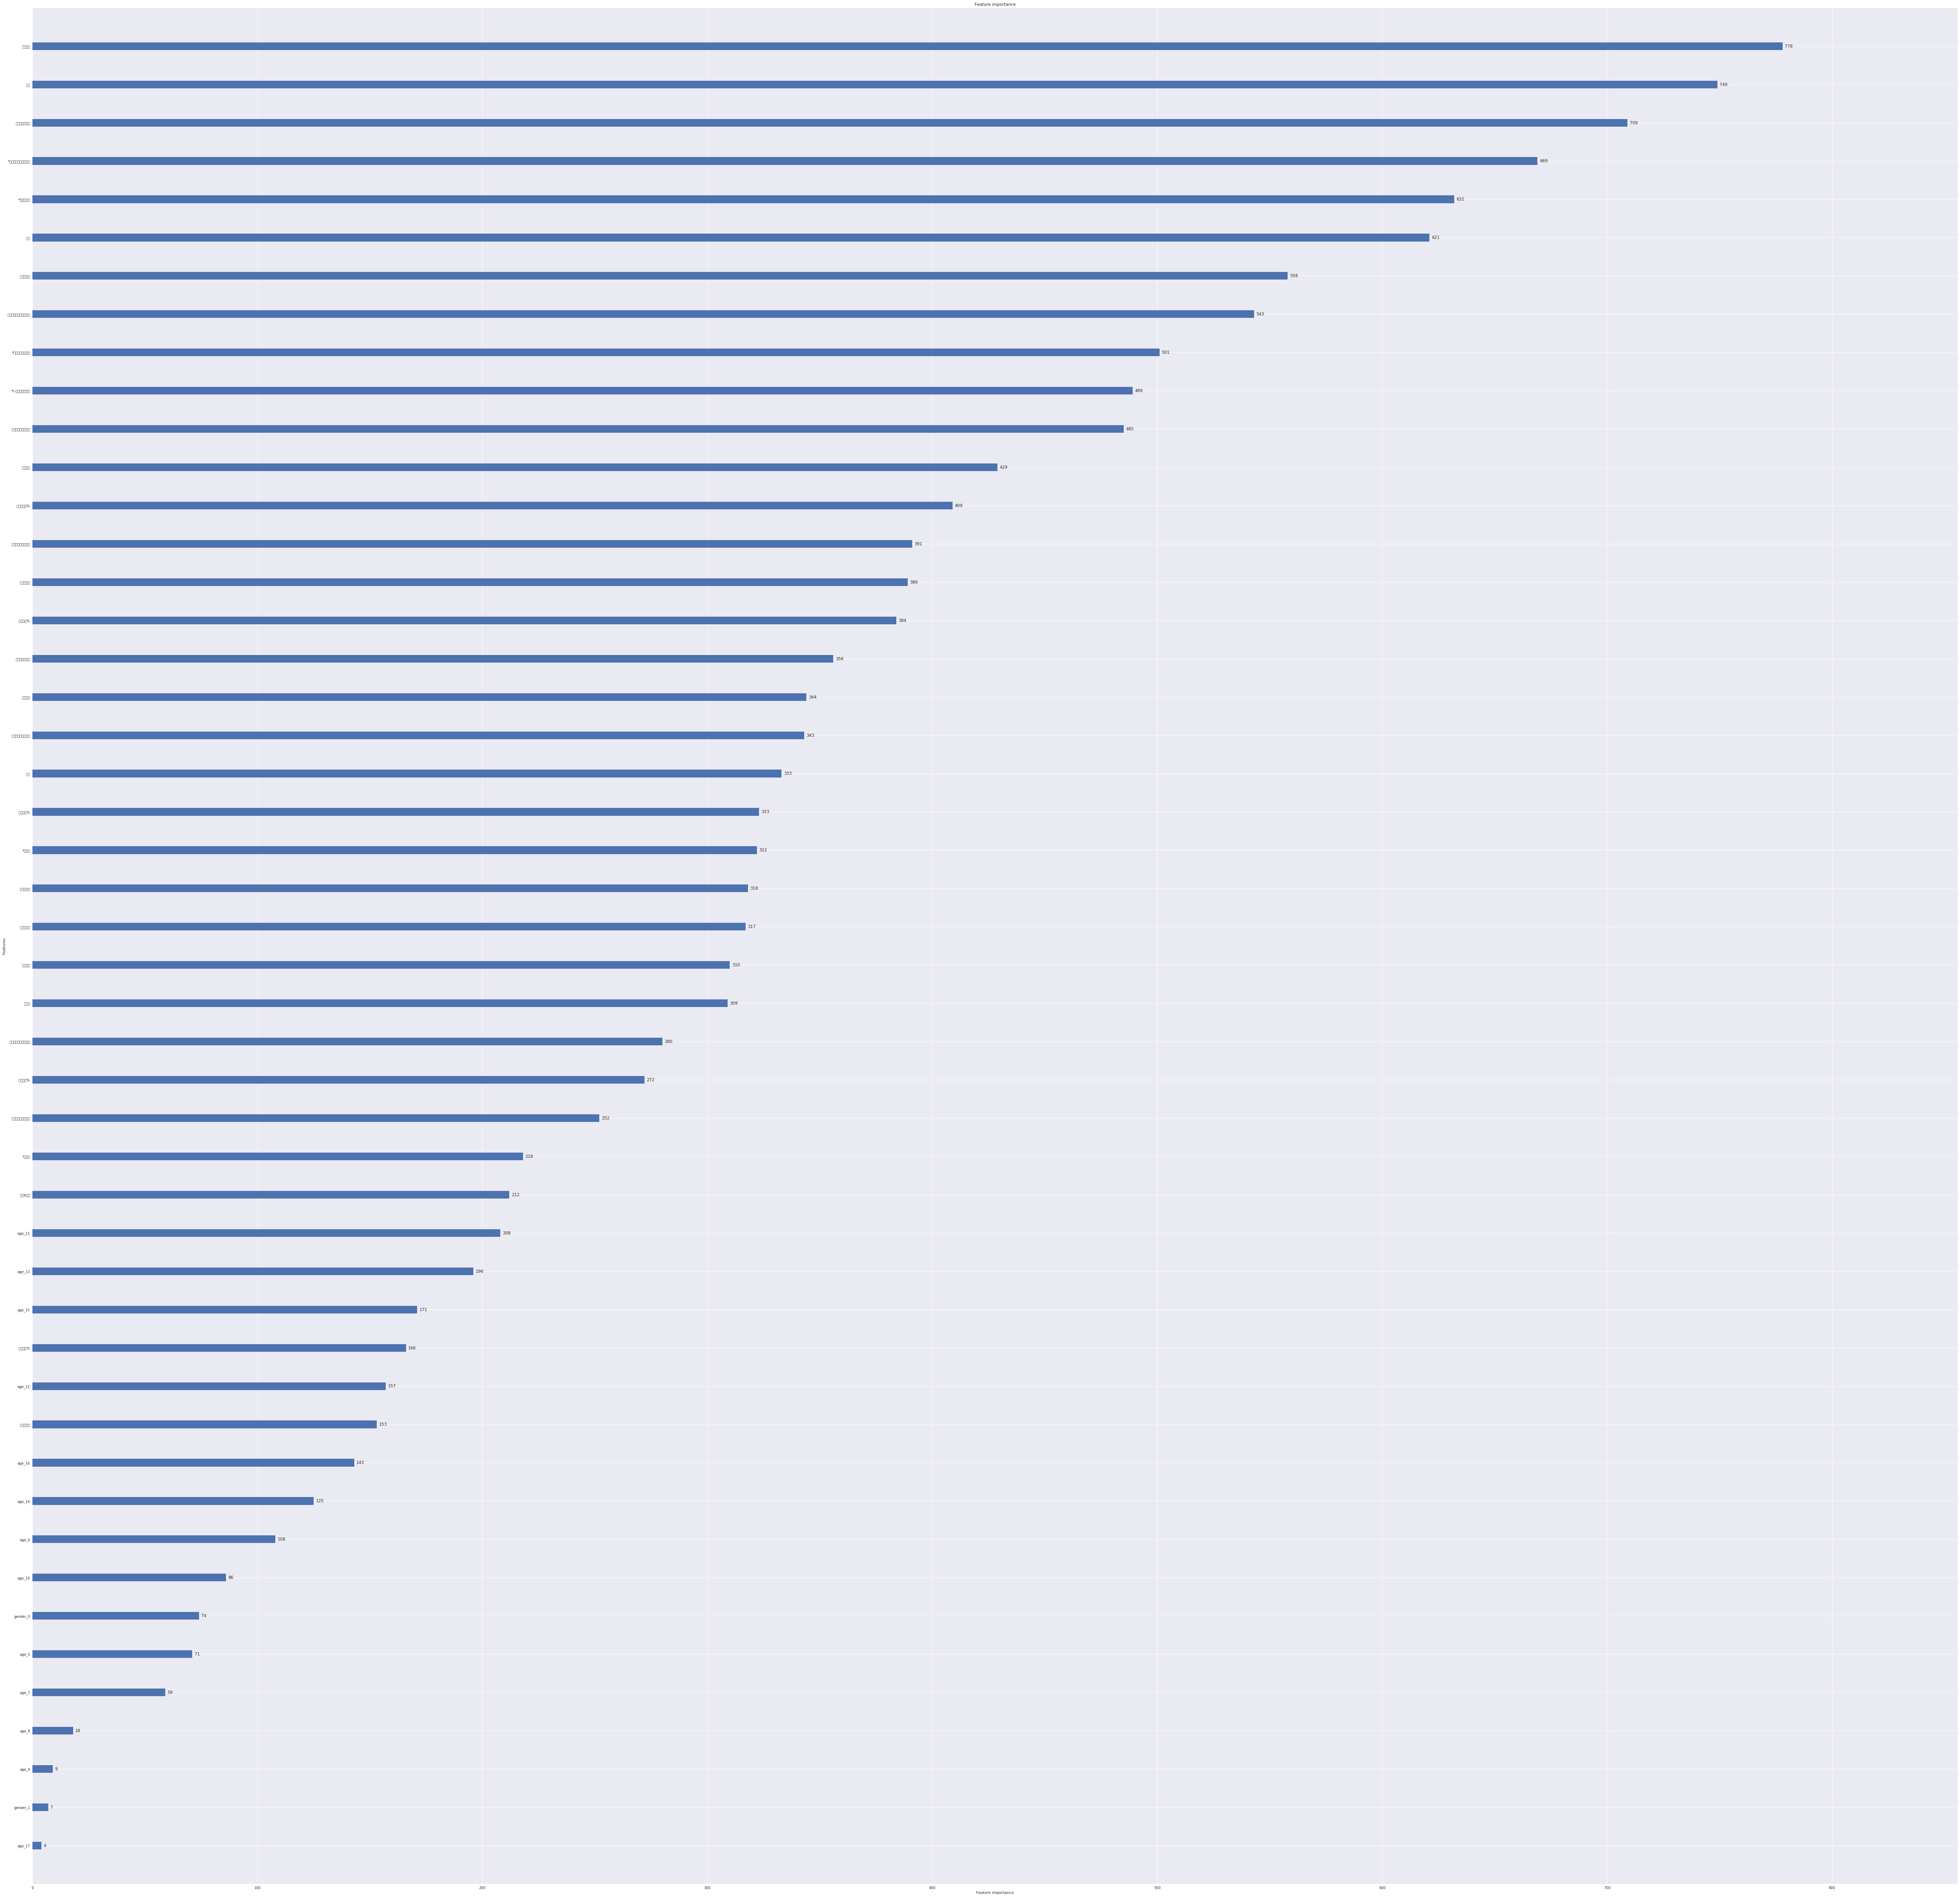

In [33]:
lgb.plot_importance(clf,figsize=(100,100))
plt.show()